### Full Name : Niloufar Dehghan
### Student Number : 403210652


# Support Vector Machines (SVM)

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

## Goal
In this assignment, we are going to implement Support Vector Machines (SVM) algorithm that determines which patient is in danger and which is not.

In [90]:
df = pd.read_csv("Liver_Disease.csv") 

In [91]:
print(df)

     Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0     65  Female              0.7               0.1                   187   
1     62    Male             10.9               5.5                   699   
2     62    Male              7.3               4.1                   490   
3     58    Male              1.0               0.4                   182   
4     72    Male              3.9               2.0                   195   
..   ...     ...              ...               ...                   ...   
578   60    Male              0.5               0.1                   500   
579   40    Male              0.6               0.1                    98   
580   52    Male              0.8               0.2                   245   
581   31    Male              1.3               0.5                   184   
582   38    Male              1.0               0.3                   216   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  

### Pre-Processing

#### Exploratory Data Analysis:
In statistics, exploratory data analysis is an approach to analyze datasets to summarize their main characteristics, often using statistical graphics and other data visualization methods.

This is a general approach that should be applied when you encounter a dataset.

shape of dataset: (583, 11)

Dataset contains missing values: True
Missing values per column:
Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
label                         0
dtype: int64
Class counts:
1    416
2    167
Name: label, dtype: int64

Class proportions:
1    0.713551
2    0.286449
Name: label, dtype: float64

Is dataset approximately balanced (33%-66% per class)? False


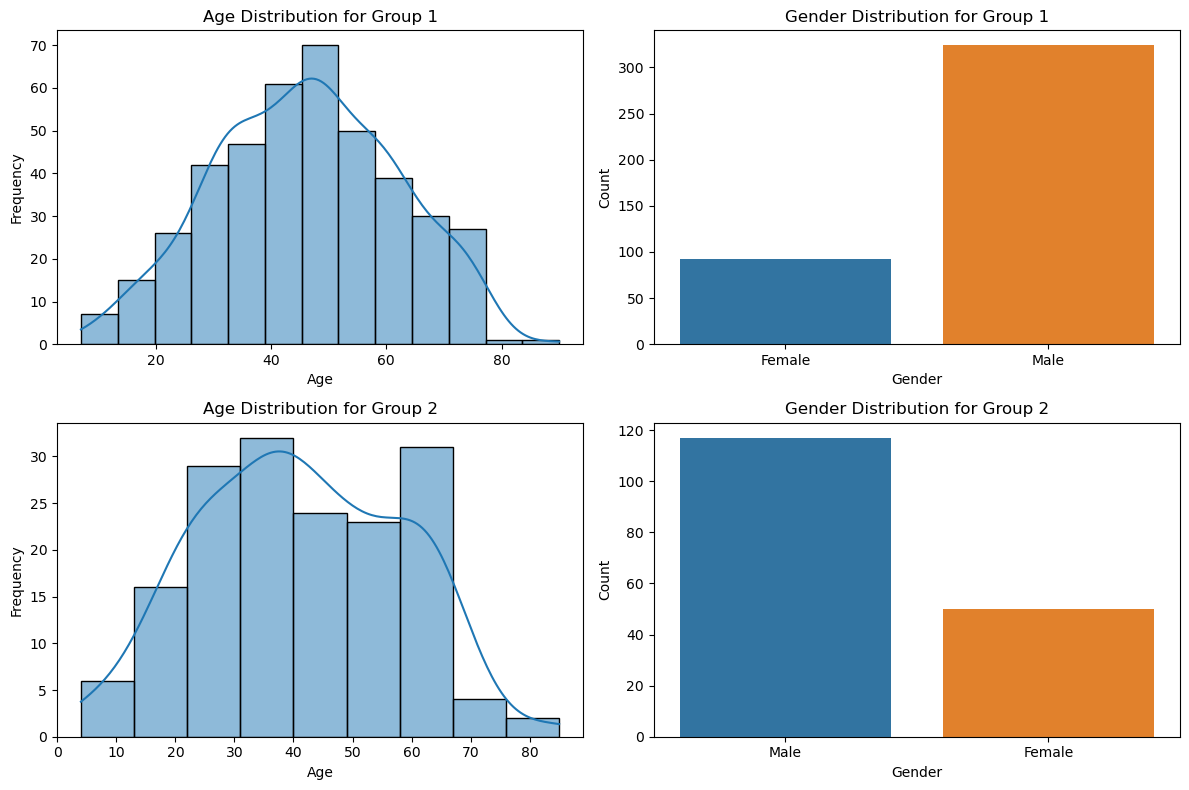

In [92]:
###############################################################################
## TODO: Find the shape of the dataset. 
print(f"shape of dataset: {df.shape}")
###############################################################################


###############################################################################
## TODO: Check if there is missing entries in the dataset columnwise. 
has_missing_values = df.isnull().values.any()  
print(f"\nDataset contains missing values: {has_missing_values}")  
missing_values_count = df.isnull().sum()  
print(f"Missing values per column:\n{missing_values_count}")  
###############################################################################

###############################################################################
## TODO: Check whether the dataset is balanced or not.   
class_counts = df['label'].value_counts()  
print(f"Class counts:\n{class_counts}")  
class_proportions = class_counts / len(df)  
print(f"\nClass proportions:\n{class_proportions}")  
is_balanced = all(0.33 < prop < 0.66 for prop in class_proportions) #check if all proportions are roughly between 33% and 66%  
print(f"\nIs dataset approximately balanced (33%-66% per class)? {is_balanced}")  
###############################################################################

###############################################################################
## TODO: plot the age distirbution and gender distrbution for both group    ##
## of patients.(4 plots)  

plt.figure(figsize=(12, 8))  

for i, group in enumerate([1,2]):
    group_data = df[df['label'] == group]  

      
    plt.subplot(2, 2, i * 2 + 1)  
    sns.histplot(group_data['Age'], kde=True)  
    plt.title(f'Age Distribution for Group {group}')  
    plt.xlabel('Age')  
    plt.ylabel('Frequency')  

      
    plt.subplot(2, 2, i * 2 + 2)  
    sns.countplot(x='Gender', data=group_data)  
    plt.title(f'Gender Distribution for Group {group}')  
    plt.xlabel('Gender')  
    plt.ylabel('Count')  

plt.tight_layout()  
plt.show()  
###############################################################################


##### Question: What do you conclude from the plots?
The graphs visually demonstrate that gender and age are effective features for classification.

#### Outlier Detection & Removal
Check whether we have outliers in the data. If there are, delete them.

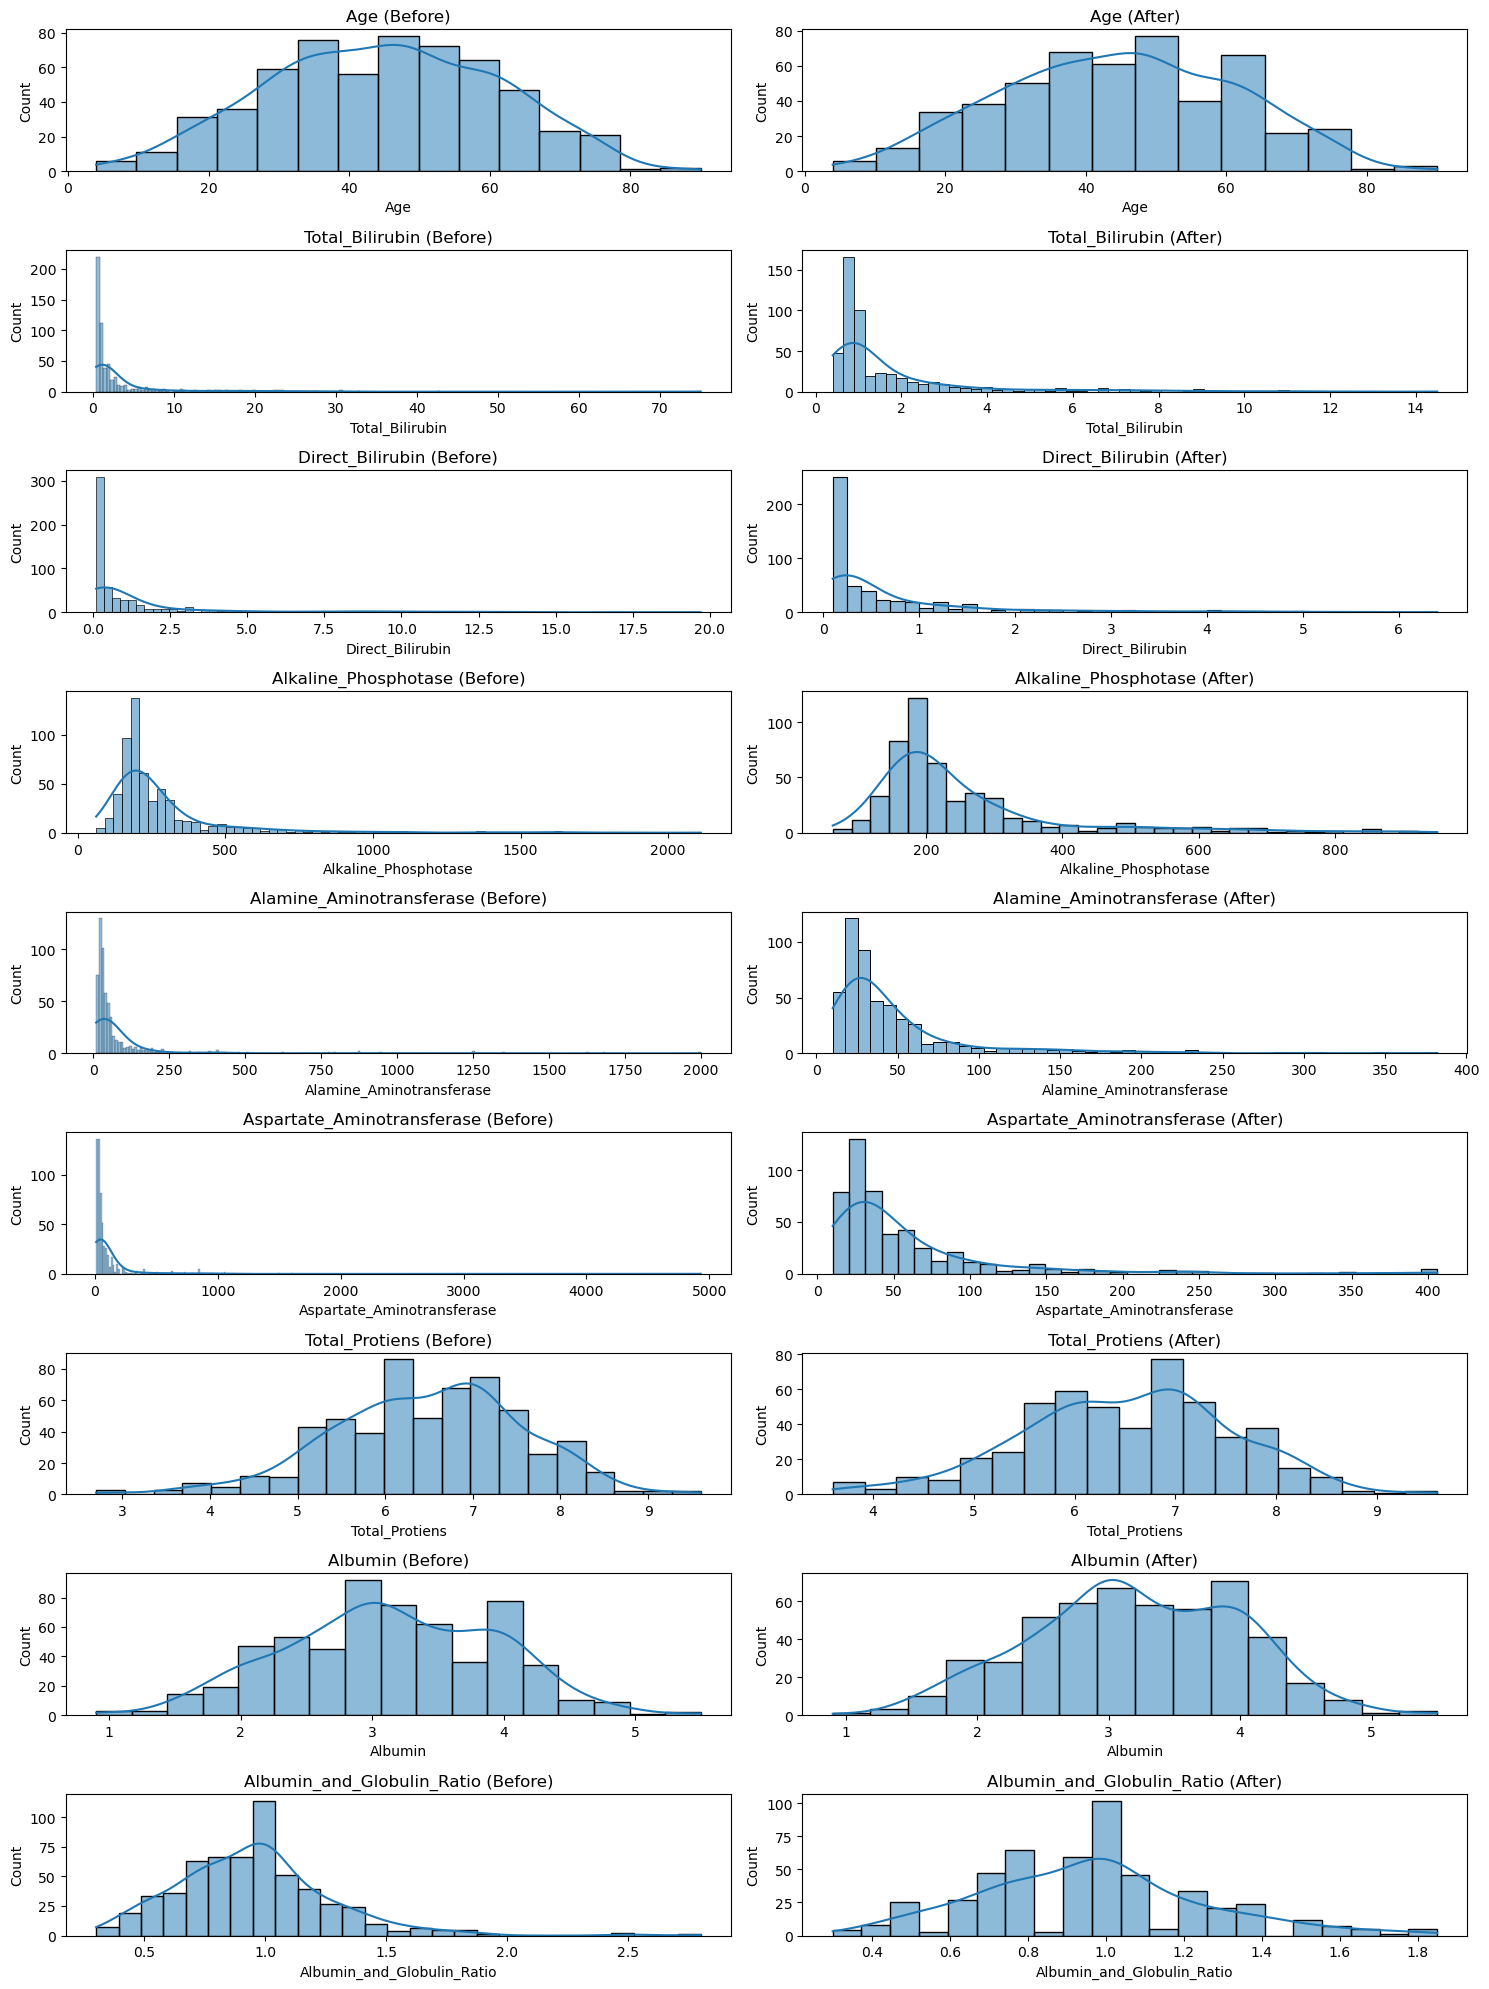

Number of data points removed: 80
Size of DataFrame after outlier removal: 503


In [93]:
################################################################################
## 
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  

# List of numerical columns  
numerical_cols = ['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',  
                  'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens',  
                  'Albumin', 'Albumin_and_Globulin_Ratio']  

# Function to remove outliers using Z-score  
def remove_outliers_zscore(df, col, threshold=3):  
    df_copy = df.copy()  
    df_copy['z_score'] = np.abs((df_copy[col] - df_copy[col].mean()) / df_copy[col].std())  
    df_copy = df_copy[df_copy['z_score'] <= threshold]  
    return df_copy.drop('z_score', axis=1)  

df_no_outliers = df.copy()  

non_numerical_cols = [col for col in df.columns if col not in numerical_cols]  
 
for col in numerical_cols:  
    df_no_outliers = remove_outliers_zscore(df_no_outliers, col)   
plt.figure(figsize=(15, 20))  

for i, col in enumerate(numerical_cols):  
    plt.subplot(9, 2, 2 * i + 1)  
    sns.histplot(df[col], kde=True)  
    plt.title(f'{col} (Before)')  

    plt.subplot(9, 2, 2 * i + 2)  
    sns.histplot(df_no_outliers[col], kde=True)  
    plt.title(f'{col} (After)')  

plt.tight_layout()  
plt.show()  

print(f'Number of data points removed: {len(df) - len(df_no_outliers)}')  
print(f'Size of DataFrame after outlier removal: {len(df_no_outliers)}')
################################################################################


#### Feature Engineering:
Sometimes the collected data are raw; they are either incompatible with your model or hinders its performance. That’s when feature engineering comes to rescue. It encompasses preprocessing techniques to compile a dataset by extracting features from raw data.
also feel free to do more feature engineering techniques if needed.

In [96]:
################################################################################
## TODO: Normalize numerical features to be between 0 and 1                   ##
## Note that just numerical fetures should be normalized.
import pandas as pd  
from sklearn.preprocessing import MinMaxScaler, LabelBinarizer  

# 1. Normalize numerical features  
scaler = MinMaxScaler()  
df_normalized_numerical = scaler.fit_transform(df_no_outliers[numerical_cols])  
df_normalized_numerical = pd.DataFrame(df_normalized_numerical, columns=numerical_cols)  

# 2. Binarize gender (assuming 'gender_col' is the column name for gender)  
lb = LabelBinarizer()  
df_normalized_gender = lb.fit_transform(df_no_outliers['Gender'])  
df_normalized_gender = pd.DataFrame(df_normalized_gender, columns=['Gender'])  


# 3. Concatenate normalized numerical and binarized gender dataframes.    
df_final = pd.concat([df_normalized_numerical, df_normalized_gender], axis=1)  

################################################################################

### SVM

#### spliting data

In [97]:
## TODO Split the data into test and training sets.
import numpy as np
from sklearn.model_selection import train_test_split 
from imblearn.over_sampling import SMOTE 

X = df_final 
y = df_no_outliers['label'] 
# One-hot encode the Gender column  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   


### SVM using Scikit-Learn:
First of all train an svm model with default parameters and report its.

In [30]:
#########################################################################################
## TODO
# Create an SVM model with default parameters
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

svm_model = SVC()

svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))
#########################################################################################


Accuracy: 0.68
              precision    recall  f1-score   support

           1       0.83      0.62      0.71        64
           2       0.55      0.78      0.64        37

    accuracy                           0.68       101
   macro avg       0.69      0.70      0.68       101
weighted avg       0.73      0.68      0.69       101



#### Grid Search
Use Grid search and validation set to find the best parameters for your SVM model.

In [65]:
#########################################################################################
## TODO
from sklearn.model_selection import GridSearchCV, StratifiedKFold  
from sklearn.svm import SVC
from sklearn.utils import class_weight
from sklearn.preprocessing import StandardScaler  
 

smote = SMOTE(random_state=42)  
X_resampled, y_resampled = smote.fit_resample(X, y)  


param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': [1, 0.1, 0.01, 0.001, 'auto', 'scale']
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  
svm_model = SVC()
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=skf, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_resampled, y_resampled)

print("Best hyperparameters:", grid_search.best_params_)  
print("Best accuracy:", grid_search.best_score_)
#########################################################################################


Best hyperparameters: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Best accuracy: 0.7014705882352942


In [66]:

# Method 1:  Simple Pandas DataFrame (Top N)  
results_df = pd.DataFrame(grid_search.cv_results_)  
relevant_cols = ['param_C', 'param_kernel', 'param_gamma', 'mean_test_score', 'std_test_score', 'rank_test_score']  
top_n = 5 
top_results = results_df[relevant_cols].sort_values('rank_test_score').head(top_n)  
print("Method 1: Top", top_n, "results:\n", top_results)  



Method 1: Top 5 results:
    param_C param_kernel param_gamma  mean_test_score  std_test_score  \
47     100          rbf       scale         0.701471        0.033405   
37     100          rbf           1         0.697059        0.035233   
11     0.1          rbf       scale         0.677941        0.011765   
45     100          rbf        auto         0.676471        0.012304   
39     100          rbf         0.1         0.676471        0.012304   

    rank_test_score  
47                1  
37                2  
11                3  
45                4  
39                4  


Train an svm model on the entire training data using the parameters you found in the previous step.

In [73]:

#########################################################################################
## TODO
# Create an SVM model with default parameters
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

svm_model = SVC(C= 100, gamma='scale', kernel='rbf')

smote = SMOTE(random_state=42)  
X_resampled, y_resampled = smote.fit_resample(X_train, y_train) 

svm_model.fit(X_resampled, y_resampled)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))
#########################################################################################

#########################################################################################


Accuracy: 0.64
              precision    recall  f1-score   support

           1       0.80      0.58      0.67        64
           2       0.51      0.76      0.61        37

    accuracy                           0.64       101
   macro avg       0.66      0.67      0.64       101
weighted avg       0.70      0.64      0.65       101



### Confusion Matrix
Plot the confusion matrix and report the model accuracy on test set.
What does each entry of the confusion matrix mean?

Text(0.5, 1.0, 'Confusion Matrix')

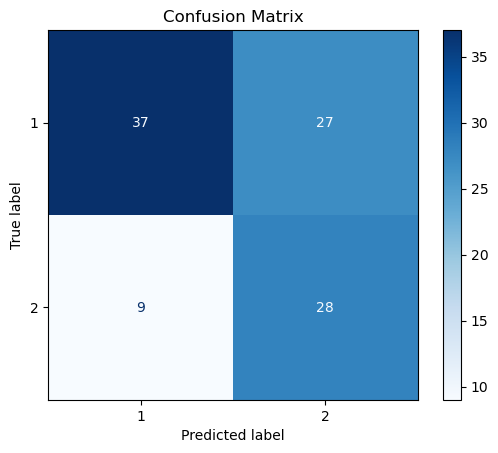

In [74]:
#########################################################################################
## TODO
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay  

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
#########################################################################################


Add some outliers to the dataset, train an SVM and logistic regression model, and compare the results.

In [111]:
#########################################################################################
## TODO
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.datasets import make_classification
import pandas as pd  
import numpy as np  

def add_random_outliers(df, y, num_outliers, multiplier=10):  
    num_cols = len(df.columns)  
    outlier_data = []  
    outlier_labels = []  

    for _ in range(num_outliers):  
        new_row = [np.random.rand() * multiplier for _ in range(num_cols)]  
        outlier_data.append(new_row)  
        # Randomly select a label from y (ensuring both 1 and 2 are used)  
        outlier_labels.append(np.random.choice(y[y == 1].values if np.random.rand() < 0.5 else y[y==2].values))  

    outlier_df = pd.DataFrame(outlier_data, columns=df.columns)  
    df_with_outliers = pd.concat([df, outlier_df], ignore_index=True)  
    y_with_outliers = np.concatenate((y, np.array(outlier_labels)))  
    return df_with_outliers, y_with_outliers  


smote = SMOTE(random_state=42)  
X_resampled, y_resampled = smote.fit_resample(X_train, y_train) 


# Train Logistic Regression model with outliers
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_resampled, y_resampled)
y_pred_logistic = logistic_model.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f"Logistic Regression Accuracy without outlier: {accuracy_logistic:.2f}")
print(classification_report(y_test, y_pred_logistic))



svm_model = SVC(C= 100, gamma='scale', kernel='rbf')

svm_model.fit(X_resampled, y_resampled)
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy without outlier: {accuracy:.2f}")
print(classification_report(y_test, y_pred))



# Add outliers to the training set
X_train_outliers, y_with_outliers =add_random_outliers(X_resampled,y_resampled, num_outliers=20, multiplier=100)

# Train Logistic Regression model with outliers
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_outliers, y_with_outliers)
y_pred_logistic = logistic_model.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f"Logistic Regression Accuracy with outlier: {accuracy_logistic:.2f}")
print(classification_report(y_test, y_pred_logistic))



svm_model.fit(X_train_outliers, y_with_outliers)
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy with outlier: {accuracy:.2f}")
print(classification_report(y_test, y_pred))
#########################################################################################


Logistic Regression Accuracy without outlier: 0.65
              precision    recall  f1-score   support

           1       0.78      0.62      0.70        64
           2       0.52      0.70      0.60        37

    accuracy                           0.65       101
   macro avg       0.65      0.66      0.65       101
weighted avg       0.69      0.65      0.66       101

SVM Accuracy without outlier: 0.67
              precision    recall  f1-score   support

           1       0.82      0.62      0.71        64
           2       0.54      0.76      0.63        37

    accuracy                           0.67       101
   macro avg       0.68      0.69      0.67       101
weighted avg       0.71      0.67      0.68       101

Logistic Regression Accuracy with outlier: 0.54
              precision    recall  f1-score   support

           1       0.74      0.44      0.55        64
           2       0.43      0.73      0.54        37

    accuracy                           0.54     

Support vector machines (SVMs) proved more robust to outlier data than logistic regression, as anticipated.